This Jupyter Notebook contains my first attempt at solving: https://www.kaggle.com/code/erkanhatipoglu/univariate-linear-regression-from-scratch 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
#Importing the train & test data from local .csv files
train_data = pd.read_csv(r"C:\Users\himan\OneDrive - iitkgp.ac.in\Desktop\ML CodeBase\SML-C1\train.csv")
test_data = pd.read_csv(r"C:\Users\himan\OneDrive - iitkgp.ac.in\Desktop\ML CodeBase\SML-C1\test.csv")

In [80]:
#Ensuring Data Validity
train_data = train_data.dropna()
test_data = test_data.dropna()

In [81]:
x_train = train_data['x'].to_numpy()
y_train = train_data['y'].to_numpy()
x_test = test_data['x'].to_numpy()
y_test = test_data['y'].to_numpy()

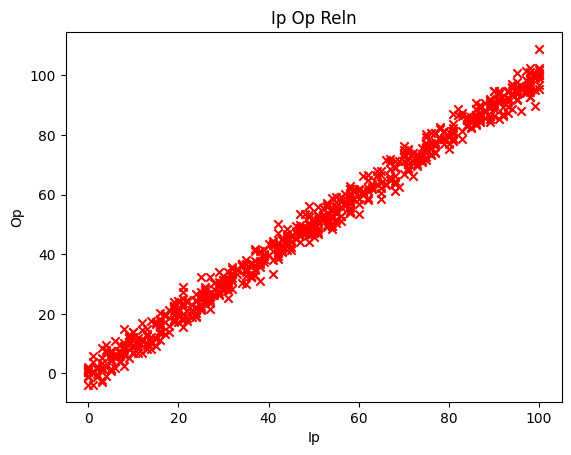

In [82]:
#Visualising the input output relationship before proceeding
plt.scatter(x_train, y_train, color = "r", marker = "x")
plt.title("Ip Op Reln")
plt.xlabel("Ip")
plt.ylabel("Op")
plt.show()

In [98]:
#Implementing Linear Regression - cos just look at the damn plot
def cost_fn(x: np.ndarray, y: np.ndarray, w: float, b: float) -> float:
    if(len(x) != len(y)):
        raise Exception("Data Compatibility Error. [len(x) != len(y)]")
    else:
        m = len(x)
        y_pred = x * w + b
        loss = y_pred - y
        loss = loss ** 2
        cost = loss.mean() / 2
    return cost


In [100]:
def gradient_descent_basic(x: np.ndarray, y: np.ndarray, w_init: float, b_init: float, alpha: float, num_iters: int) -> tuple[float, float]:
    if(len(x) != len(y)):
        raise Exception("Dataset Compatibility Error. [len(x) != len(y)]")
    else:
        w = w_init
        b = b_init
        J_hist = np.zeros(num_iters)
        for i in range(num_iters):
            y_pred = w * x + b  # vectorized prediction
            error = y_pred - y
            dw = (np.dot(x, error)).mean()
            db = error.mean()
            w = w - alpha * dw
            b = b - alpha * db
            J_hist[i] = cost_fn(x, y, w, b)
    return w, b, J_hist

In [104]:
def gradient_descent_alpha_update(x: np.ndarray, y: np.ndarray, w_init: float = 0, b_init: float = 0,  alpha: float = 1, num_iters: int = 10000):
    if(len(x) != len(y)):
        raise Exception("Data Compatibility Error. [len(x) != len(y)]")
    else:
        w = w_init
        b = b_init
        J_hist = np.zeros(num_iters) 
        #flag1 = 1
        for i in range(num_iters):
            y_pred = w * x + b
            loss = y_pred - y
            tmp_loss_w = np.dot(loss, x)
            tmp_loss_b = loss.mean()
            w_new = w - alpha * tmp_loss_w
            b_new = b - alpha * tmp_loss_b
            #if(flag1 and cost_fn(x, y, w, b) <= 3.935319494332024):
                #num = i
            if(cost_fn(x, y, w_new, b_new) <= cost_fn(x, y, w, b)):
                w, b = w_new, b_new
            else:
                alpha = alpha / 3
            J_hist[i] = cost_fn(x, y, w, b)
    return w, b, J_hist#, num

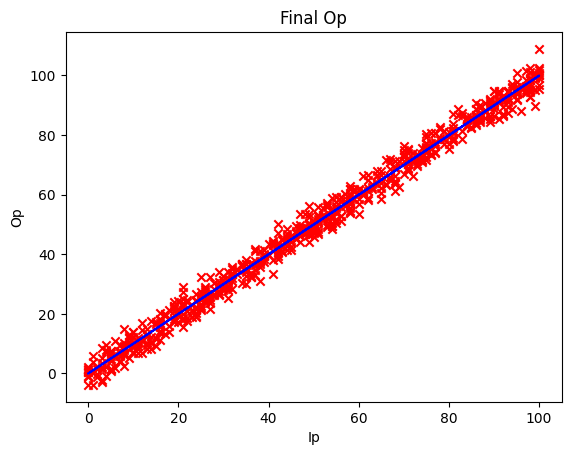

In [133]:
w_basic, b_basic, J_hist_basic = gradient_descent_basic(x_train, y_train, 0, 0, 10e-10, 30000)
w_alpha_update, b_alpha_update, J_hist_alpha_update = gradient_descent_alpha_update(x_train, y_train, 0, 0, 10e-5, 30000)
x_train_max = train_data.loc[train_data['x'].idxmax(), 'x']
x_train_min = train_data.loc[train_data['x'].idxmin(), 'x']
y_train_max = train_data.loc[train_data['x'].idxmax(), 'y']
y_train_min = train_data.loc[train_data['x'].idxmin(), 'y']
w_init = (y_train_max - y_train_min) / (x_train_max - x_train_min)
b_init = (y_train_max * x_train_min - y_train_min * x_train_max) / (x_train_min - x_train_max)
w_init_basic, b_init_basic, J_hist_init_basic = gradient_descent_basic(x_train, y_train, w_init, b_init, 10e-10, 30000)
y_pred_basic = x_train * w_basic + b_basic
y_pred_alpha_update = x_train * w_alpha_update + b_alpha_update
y_pred_init_basic = x_train * w_init_basic + b_init_basic
plt.plot(x_train, y_pred_basic, c = "b")
plt.scatter(x_train, y_train, c = "r", marker = "x")
plt.xlabel("Ip")
plt.ylabel("Op")
plt.title("Final Op")
plt.show()

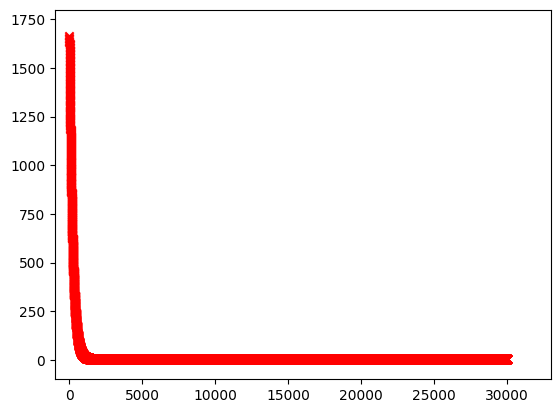

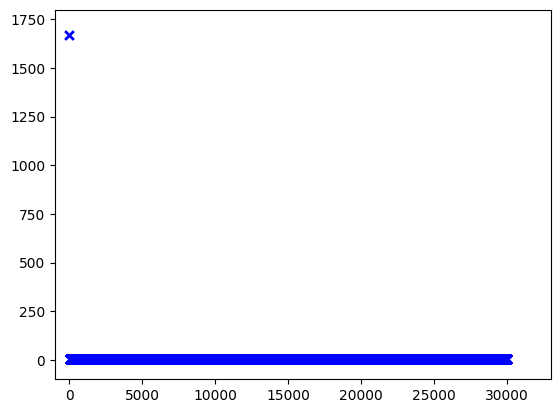

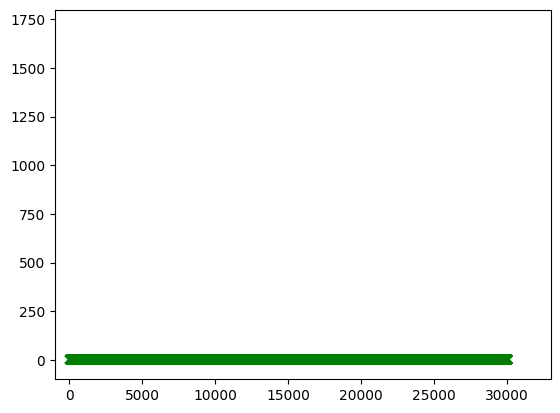

In [138]:
#Plotting the error vs the number of iterations
x_axis = np.arange(int(len(J_hist_basic)/1))
plt.figure()
plt.axis([-1000, 33000, -100, 1800])
plt.scatter(x_axis, J_hist_basic[:(int(len(J_hist_basic)/1))], color = "r", marker = "x")
plt.figure()
plt.axis([-1000, 33000, -100, 1800])
plt.scatter(x_axis, J_hist_alpha_update[:(int(len(J_hist_basic)/1))], color = "b", marker = "x")
plt.figure()
plt.axis([-1000, 33000, -100, 1800])
plt.scatter(x_axis, J_hist_init_basic[:(int(len(J_hist_basic)/1))], color = "g", marker = "x" )
plt.show()
#print(J_hist_basic)
#print(J_hist_alpha_update)

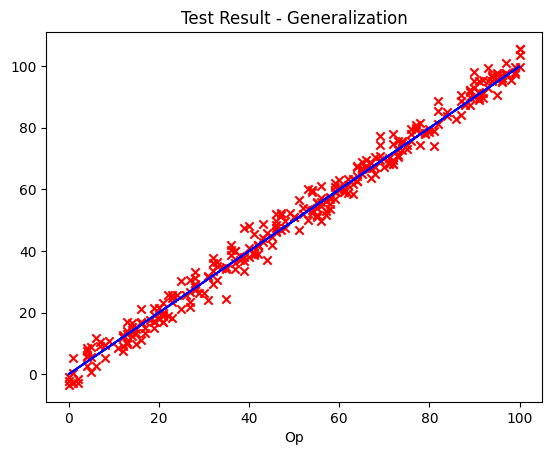

4.726934118295567


In [131]:
#Testing the hypothesis for the test data
y_pred_test = x_test * w_basic + b_basic
plt.plot(x_test, y_pred_test, color = "b")
plt.scatter(x_test, y_test, color = "r", marker = "x")
plt.title("Test Result - Generalization")
plt.xlabel("Ip")
plt.xlabel("Op")
plt.show()
print(cost_fn(x_test, y_test, w_basic, b_basic))